<a href="https://colab.research.google.com/github/jaymahapatra/IST-718-Week-6-Picking/blob/master/SportsTeamSimulation_JM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Sports Team Simulation
# Baseball
# Based on Miller (2015)

import numpy as np
import random
from scipy.stats import nbinom
from array import array

#import pyprind   # PROVIDES TIMING AWARENESS


In [0]:
def simulator(home_mean, away_mean, niterations):
    # estimates probability of home team win
    seed(1234)  # set to obtain reproducible results
    home_game_score = [0] * niterations
    away_game_score = [0] * niterations
    home_win = [0] * niterations
    i = 0
    while (i < niterations):
        home_game_score[i] = \
            nbinom.rvs(n = 4.0, p = 4.0/(4.0 + home_mean), size = 1)[0] 
        away_game_score[i] = \
            nbinom.rvs(n = 4.0, p = 4.0/(4.0 + away_mean), size = 1)[0]         
        if (home_game_score[i] > away_game_score[i]):
            home_win[i] = 1
        if ((away_game_score[i] > home_game_score[i]) or \
            (away_game_score[i] < home_game_score[i])):
            i = i + 1 
    n_home_win = sum(home_win)
    return n_home_win / niterations      

In [0]:
# NOT USED FOR IN CLASS DEMO

# pbar = pyprind.ProgBar(50000)

#niterations = 100  # use smaller number for testing
# probability matrix for results... home team rows, away team columns
#probmat = array([[0] * 9] * 9)

# matrix representation of home and away team runs for table
#homemat = array([[9] * 9, [8] * 9, [7] * 9, [6] * 9, [5] * 9,\
#    [4] * 9, [3] * 9, [2] *9, [1] * 9])
#awayrow = array([1, 2, 3, 4, 5, 6, 7, 8, 9])    
#awaymat = array([awayrow] * 9)

# generate table of probabilities
#for index_home in range(9):
#    for index_away in range(9):
#        if (homemat[index_home,index_away] != awaymat[index_home,index_away]):
#            print(index_home, index_away)
#            probmat[index_home, index_away] = \
#                simulator(float(homemat[index_home, index_away]), \
#                          float(awaymat[index_home, index_away]), niterations)
#                           #pbar.update()

#print(probmat)                

In [5]:
# estimates probability of home team win for Dodgers 2018 Home vs. Red Sox Away 2018
random.seed(1234)  # set to obtain reproducible results

niterations = 100000  # use smaller number for testing

home_game_score = [0] * niterations
away_game_score = [0] * niterations
home_mean = 4.47 #Dodgers home
away_mean = 5.03 #Red Sox away
i = 0
while (i < niterations):
    home_game_score[i] = \
        nbinom.rvs(n = 4.0, p = 4.0/(4.0 + home_mean), size = 1)[0] 
    away_game_score[i] = \
        nbinom.rvs(n = 4.0, p = 4.0/(4.0 + away_mean), size = 1)[0]         
    i = i + 1 

np.mean(home_game_score)
    


4.47283

In [6]:
np.mean(away_game_score)


5.02855

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


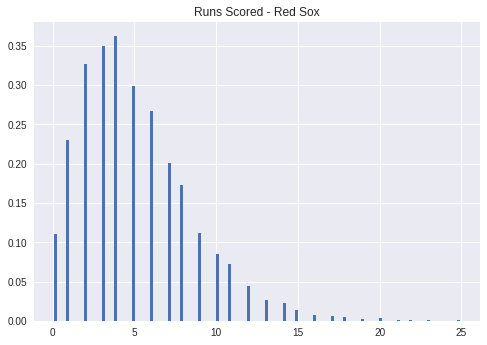

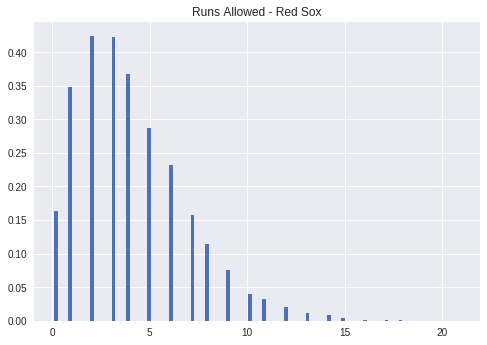

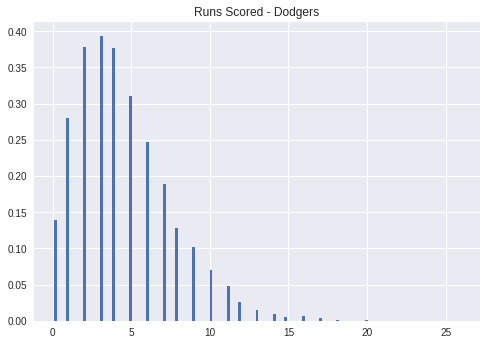

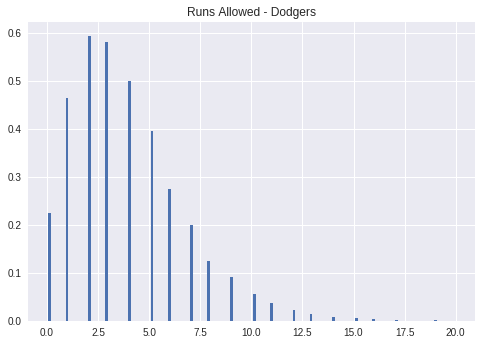

In [8]:
#  BUILD PLOTS FOR Negative Binomial MODEL
import seaborn as sns

import matplotlib.pyplot as plt

bas = 4 / (4+5.03) #Boston Away Runs
bad = 4 / (4 +4.01) #Boston Away Defense
dhs = 4 / (4 +4.47) #Dodgers Home Runs
dhd = 4 / (4 +3.86) #Dodgers Home Defense

BAwayScore = np.random.negative_binomial(4, bas, 10000)
BAwayDefend = np.random.negative_binomial(4, bad, 10000)
DHomeScore = np.random.negative_binomial(4, dhs, 10000)
DHomeDefend = np.random.negative_binomial(4, dhd, 10000)

plt.hist(BAwayScore, bins='auto', rwidth = .5, normed=True)
plt.title("Runs Scored - Red Sox")
plt.show()

plt.hist(BAwayDefend, bins='auto', rwidth = .5, normed=True) 
plt.title("Runs Allowed - Red Sox")
plt.show()

plt.hist(DHomeScore, bins='auto', rwidth = .5, normed=True) 
plt.title("Runs Scored - Dodgers")
plt.show()

plt.hist(DHomeDefend, bins='auto', rwidth = .5, normed=True)
plt.title("Runs Allowed - Dodgers")
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


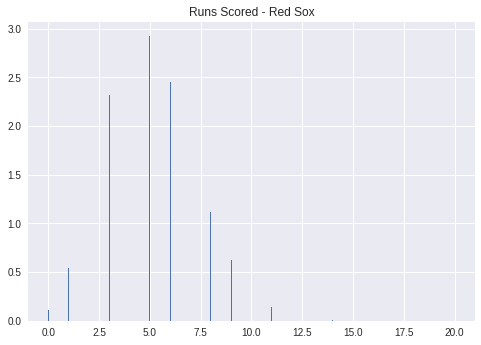

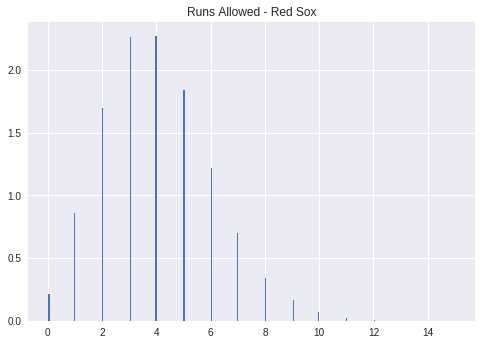

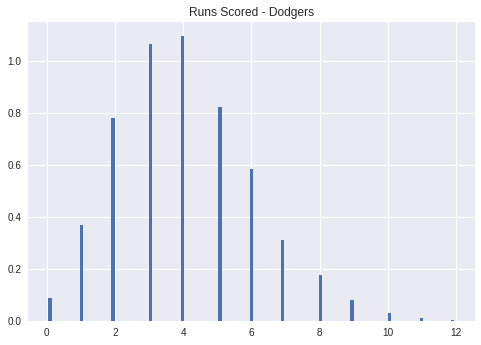

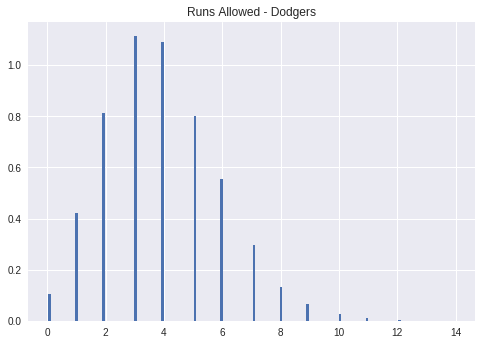

In [9]:
#  BUILD PLOTS FOR Poisson MODEL

BAwayScore = np.random.poisson(5.03, 1000000)
BAwayDefend = np.random.poisson(4.01, 100000)
DHomeScore = np.random.poisson(4.07, 10000)
DHomeDefend = np.random.poisson(3.86, 10000)

plt.hist(BAwayScore, bins='auto', rwidth = .5, normed=True) 
plt.title("Runs Scored - Red Sox")
plt.show()

plt.hist(BAwayDefend, bins='auto', rwidth = .5, normed=True)  
plt.title("Runs Allowed - Red Sox")
plt.show()

plt.hist(DHomeScore, bins='auto', rwidth = .5, normed=True)  
plt.title("Runs Scored - Dodgers")
plt.show()

plt.hist(DHomeDefend, bins='auto', rwidth = .5, normed=True) 
plt.title("Runs Allowed - Dodgers")
plt.show()

In [0]:
# Suggestion for the student: Develop simulators for football or basketball.
# Use matplotlib to create a probability heat-map for the probmat results.

